First we start with imports

In [1]:
from utils.paper_extraction import *
from utils.commonfunctions import *
from gradeSheet.extractCells import extract_cells
from gradeSheet.classifier.classifier import processCells
from gradeSheet.OCR import processCellsOCR
%matplotlib inline
%load_ext autoreload
%autoreload 2
import cv2
import pandas as pd
from openpyxl import Workbook
from openpyxl.styles import PatternFill

Train symbol model , digits model

In [2]:
from gradeSheet.classifier.train import train

digitsModel = train('../../../Dataset/Training Set/digits_dataset2')
symbolsModel = train('../../../Dataset/Training Set/symbols_dataset')
allModel = train('../../../Dataset/Training Set/all_dataset')

Loading dataset. This will take time ...
Finished loading dataset.
Accuracy: 0.9799736495388669
Loading dataset. This will take time ...
Finished loading dataset.
Accuracy: 0.9230769230769231
Loading dataset. This will take time ...
Finished loading dataset.
Accuracy: 0.9438202247191011


Extract Paper and Cells

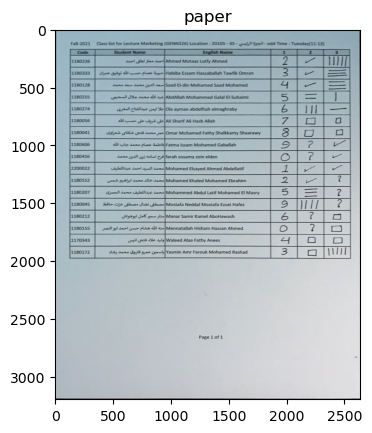

In [47]:
paper = extract_paper('../Dataset/Grade Sheet/6.jpg')
show_images([paper], ['paper'])
df, rows, cols = extract_cells(paper)

Use Classifier or OCR

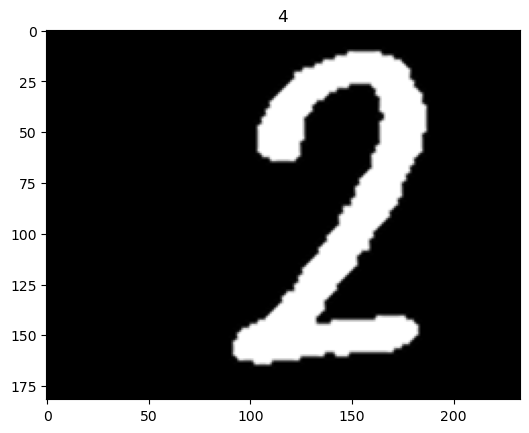

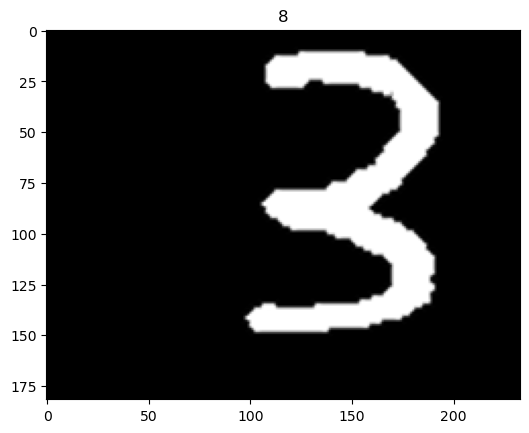

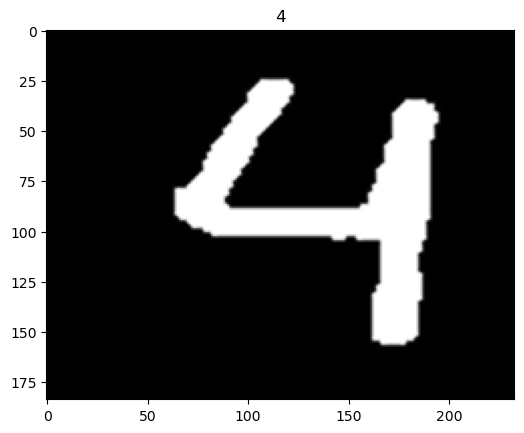

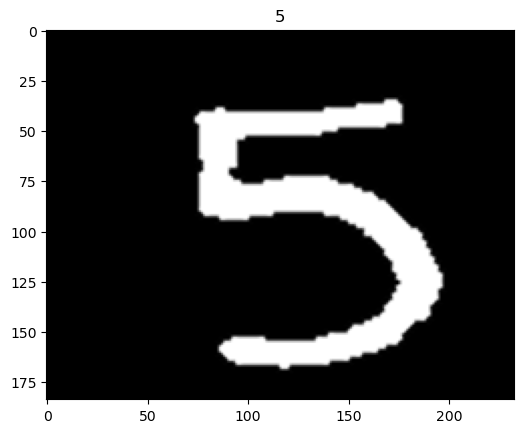

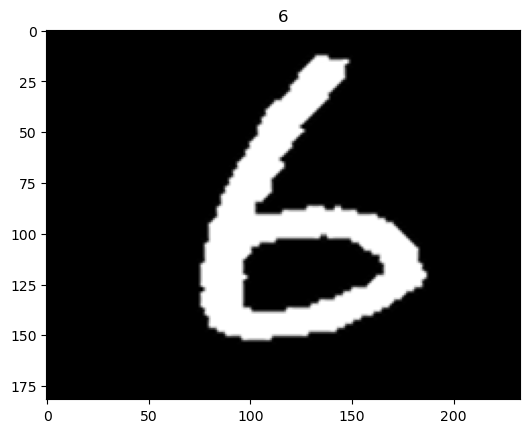

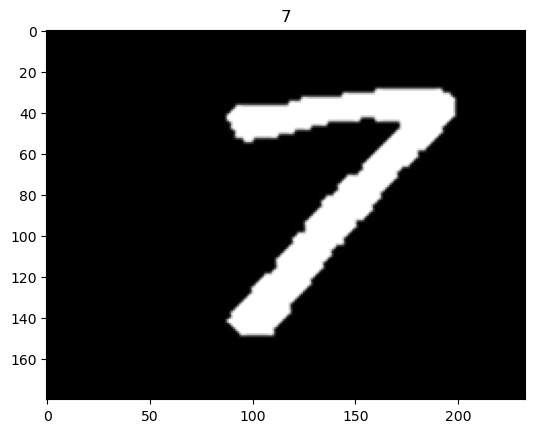

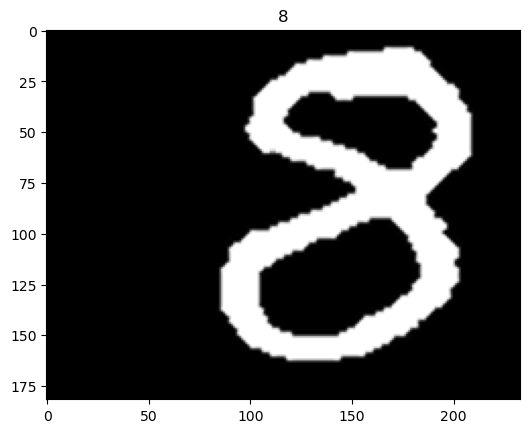

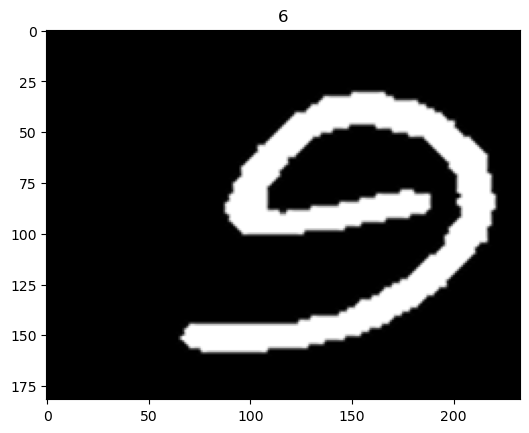

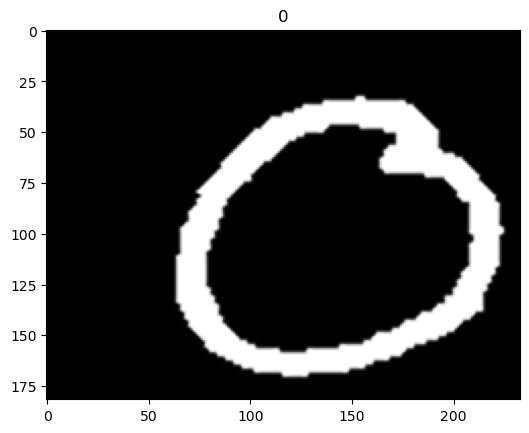

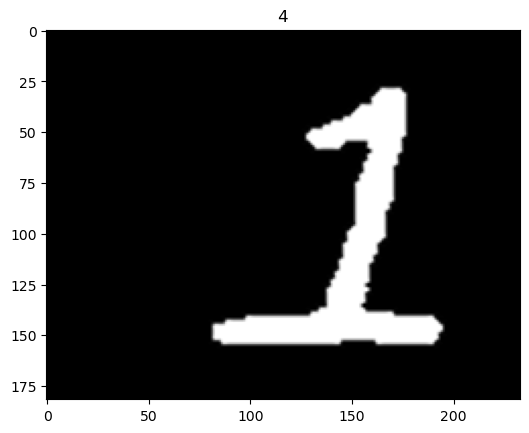

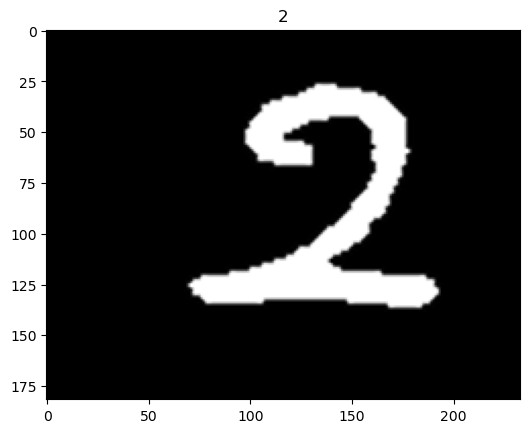

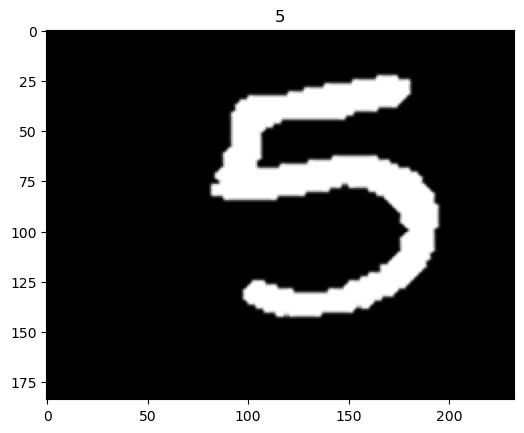

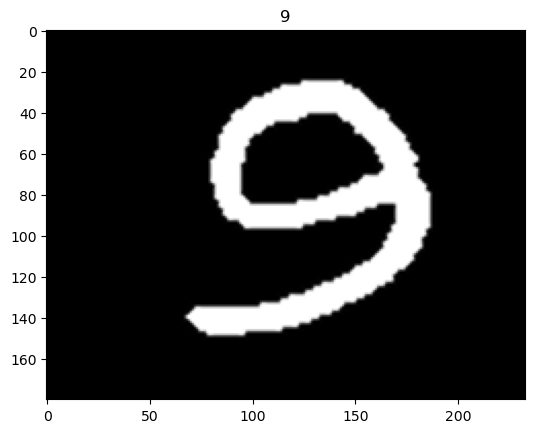

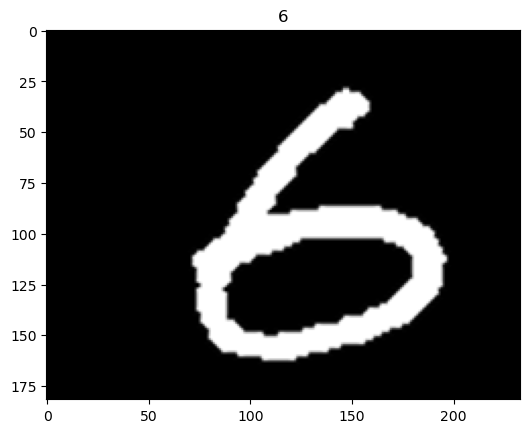

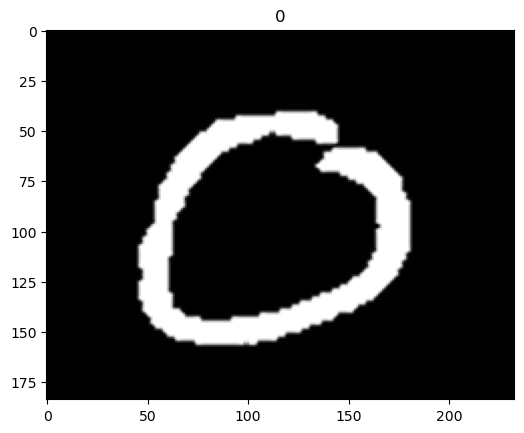

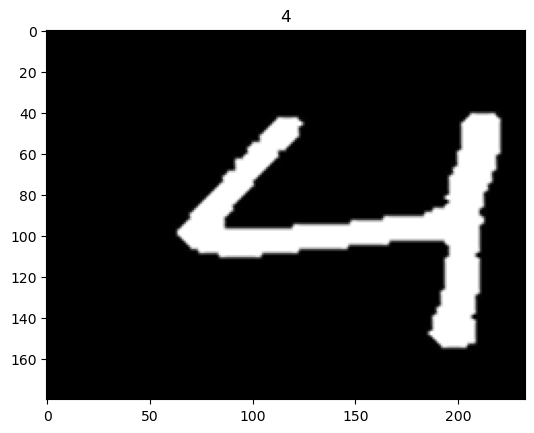

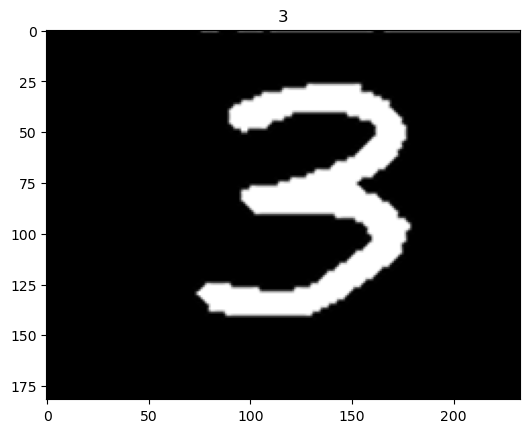

In [48]:
option = 2
data = df.copy()
result = None
if option == 2:
    result = processCells(data, digitsModel, symbolsModel)
else:
    result = processCellsOCR(data, symbolsModel)

# drop the name column
result = result.drop(result.columns[[1, 2]], axis=1)
result = result.drop(index=0).reset_index(drop=True)
result.columns = [
    "Student ID",
    "1",
    "2",
    "3"
]



Export to Excel

In [12]:
excel_path = 'output.xlsx'
with pd.ExcelWriter(excel_path, engine='openpyxl') as writer:
    # Write the DataFrame to the Excel file
    result.to_excel(writer, index=False, sheet_name='Sheet1')

    # Access the openpyxl workbook and worksheet
    workbook = writer.book
    worksheet = writer.sheets['Sheet1']

    # Define a red fill style
    red_fill = PatternFill(start_color='FFFF0000', end_color='FFFF0000', fill_type='solid')

    rows, cols = result.shape

    # Loop through rows and columns using range() and iloc
    for i in range(rows):
        for j in range(cols):
            # Access the cell value using iloc
            value = result.iloc[i, j]
            # Check if the value is a string and equals 'red', ignoring case and whitespace
            if isinstance(value, str) and value.strip().lower() == 'red':
                # Apply red color fill
                cell = worksheet.cell(row=i + 2, column=j + 1)  # Adjust row/col for Excel (1-based index)
                cell.value = ""
                cell.fill = red_fill